# <center>**Árvore de decisão e Floresta aleatória**

> Boa árvore, bons frutos.

###  **Introdução**

<div style="text-align:justify;">
As <strong> árvores de decisão </strong> são um dos modelos mais utilizados em machine learning, especialmente devido à sua alta interpretabilidade. Elas são estruturadas como grafos direcionais acíclicos, onde a previsão começa em um vértice raiz, que formula a primeira pergunta a ser feita ao modelo. Este vértice não recebe setas de entrada, mas possui duas setas de saída, que dividem os dados e levam a vértices de decisão, os quais contêm condicionais que orientam os caminhos subsequentes, gerando mais duas setas a cada bifurcação. À medida que o processo continua, os dados em cada vértice diminuem até que se alcance um ponto onde é possível realizar uma previsão. Nesse estágio, surgem os vértices folha, que representam os resultados finais das previsões. 

Esse modelo, no entanto, pode ser suscetível ao overfitting, visto que a quantidade de divisões realizadas ao longo da árvore pode levar o modelo a capturar não apenas as relações gerais nos dados, mas também peculiaridades específicas do conjunto de treinamento. Dessa forma, para contornar essa limitação, a técnica de <strong> floresta aleatória </strong> emerge como uma solução eficaz, na qual utiliza-se um ensemble de múltiplas árvores de decisão, onde cada árvore é treinada em uma amostra aleatória dos dados, utilizando apenas um subconjunto aleatório de features. Essa abordagem não apenas melhora a robustez e a precisão das previsões, mas também reduz a variância do modelo, diminuindo o risco de overfitting.
</div>

### 📚 **Importação de Bibliotecas**

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error

### 🗂️ **Importação dos dataframes**

Antes de iniciar o treinamento dos modelos, é preciso importar os dados de treino e teste definidos na "Introdução" desse projeto, bem como carregar os resultados da otimização de hiperparâmetros obtidos no notebook "Otimização de Hiperparâmetros". 

**Dataset e dados de treino e teste**

*Em todos os dataframes, realiza-se um drop da primeira coluna para retirar aquela que apenas representa o número da linha na qual o dado estava localizado no dataset original.

In [4]:
df_treino_target = pd.read_csv("data/df_treino_target.csv", sep=',')
y_treino = df_treino_target.values.ravel()

df_teste_target = pd.read_csv("data/df_teste_target.csv", sep=',')
y_teste = df_teste_target.values.ravel() 

df_treino_features = pd.read_csv("data/df_treino_features.csv", sep=',')
X_treino = df_treino_features.values

df_teste_features = pd.read_csv("data/df_teste_features.csv", sep=',')
X_teste = df_teste_features.values 

**Hiperparâmetros otimizados**

In [7]:
df_otimizacao_arvore= pd.read_csv("data/df_otimizacao_arvore.csv", sep=',')
hiperparametros_arvore = df_otimizacao_arvore.drop(df_otimizacao_arvore.columns[0], axis=1)
display(hiperparametros_arvore)

,min_exemplos_split,min_exemplos_folha,max_depth
0,7,10,24


In [14]:
df_otimizacao_floresta= pd.read_csv("data/df_otimizacao_floresta.csv", sep=',')
hiperparametros_floresta = df_otimizacao_floresta.drop(df_otimizacao_floresta.columns[0], axis=1)
display(hiperparametros_floresta)

,n_estimators,min_samples_split,min_samples_leaf,max_depth
0,95,2,1,24


**Definição da semente aleatória**

In [15]:
semente_aleatoria = 101820

### 🌳 **Implementação da árvore de decisão**

**Treinamento do modelo**

Utilizando os valores de hiperparâmetros obtidos pela biblioteca ``optuna``, é possível implementar o modelo de árvore de decisão.

In [24]:
modelo_arvore_decisao = DecisionTreeRegressor(
        min_samples_split = 7,
        min_samples_leaf = 10,
        max_depth = 24,
        random_state = semente_aleatoria
    )

modelo_arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=10, min_samples_split=7,
                      random_state=101820)

**Visualização da Árvore de decisão**

Uma das grandes vantagens das árvores de decisão é a sua alta interpretabilidade, uma vez que esse modelo pode ser visualizado na forma de um grafo. Assim, é possível obter representações visuais que facilitam a compreensão do processo de tomada de decisão, como aquela presente no arquivo gerado abaixo ("arvore_decisao.pdf"). 

Vale ressaltar que a utilização da biblioteca ``graphviz`` foi necessária para permitir a visualização, dado que a imagem da árvore gerada em bibliotecas como o ``matplotlib`` era pequena demais para permitir a leitura.

In [18]:
dot_data = export_graphviz(modelo_arvore_decisao, out_file=None, 
                           feature_names=df_treino_features.columns,
                           filled=True, rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("arvore_decisao_visualizacao")  
graph.view()

'arvore_decisao_visualizacao.pdf'

**Validação cruzada**

A partir da validação cruzada, é possível obter um estimador do desempenho do modelo obtido.

In [ ]:
scores_arvore = cross_val_score(modelo_arvore_decisao, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_arvore = np.mean(scores_arvore)
print(f"O RMSE do modelo árvore de decisão foi de {-RMSE_arvore} K.")

O RMSE do modelo árvore de decisão foi de 14.634610374590613 K.


Portanto, com base na validação cruzada, podemos estimar que o modelo de árvore de decisão apresentou um RMSE de aproximadamente 14,63 K.

Por último, apenas é necesssário adicionar esse resultado ao dataframe de resultados do RMSE definido na introdução.

In [6]:
df_RMSE= pd.read_csv("data/df_resultados_RMSE.csv", sep=',')
df_RMSE["Árvore de decisão"] = [-RMSE_arvore]
df_RMSE.to_csv("df_RMSE.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df_RMSE_resultados.csv'

### 🌲🌳 **Implementação da floresta aleatória**

**Treinamento do modelo**

Ao utilizar os hiperparâmetros otimizados para a floresta aleatória dos dados, é possível implementar o modelo.

In [20]:
modelo_floresta = RandomForestRegressor(
    n_estimators = 95,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_depth = 24,
    bootstrap = True,
    random_state = 6969
)

modelo_floresta.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=24, n_estimators=95, random_state=6969)

In [ ]:
previsoes_geral = modelo_fa.predict(X_teste)
previsoes_ind = [arvore.predict(X_teste) for arvore in modelo_fa.estimators_]

**Validação cruzada**

Assim como realizado nos demais modelos, utilizando a validação cruzada é possível obter uma estimativa da performance do modelo.

In [ ]:
scores_floresta = cross_val_score(modelo_floresta, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_floresta = np.mean(scores_floresta)
print(f"O RMSE do modelo floresta aleatória foi de {-RMSE_floresta} K.")

O RMSE do modelo floresta aleatória foi de 11.601069265602318 K.


Ou seja, é possível concluir que a floresta aleatória apresentou um RMSE de, em média, 11.60 K.

### 📈**Análise gráfica das performances**

Para visualizar a eficiência dos modelos, é possível plotar um gráfico que mostra a relação entre os valores reais e os valores preditos por um modelo. A linha diagonal representa a linha ideal onde os valores preditos seriam iguais aos reais (ou seja, uma previsão perfeita), enqunato a dispersão dos pontos em torno dessa linha indica as previsões realizadas pelo modelo. Quanto mais próximo da linha, melhor a performance do modelo.

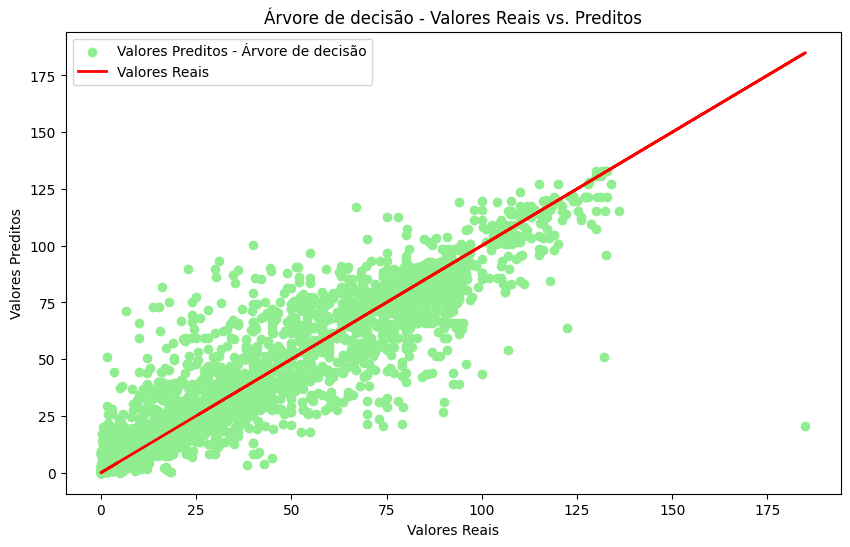

In [ ]:
y_pred_arvore = modelo_arvore_decisao.predict(X_teste)
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_arvore, color='lightgreen', label='Valores Preditos - Árvore de decisão')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('Árvore de decisão - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


<center> [Gráfico 1: Valores Reais vs Valores preditos pela Árvore de decisão]

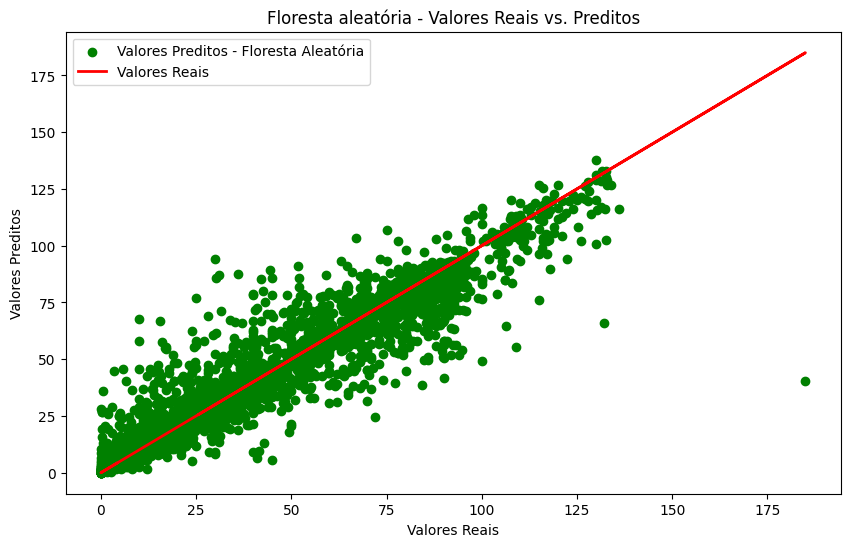

In [ ]:
y_pred_floresta = modelo_floresta.predict(X_teste)
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_floresta, color='green', label='Valores Preditos - Floresta Aleatória')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('Floresta aleatória - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


<center> [Gráfico 2: Valores Reais vs Valores preditos pela Floresta aleatória]

No geral, os gráficos 1 e 2 indicam que o modelo geralmente faz boas previsões, mas há alguma variabilidade. Os pontos mais distantes da linha sugerem onde o modelo teve maior erro - em geral, para temperaturas mais elevadas, ou seja, para os outliers do dataset identificados no notebook introdutório.

### 📊 **Importância dos atributos**

Como mencionado no notebook de "Otimização de hiperparâmetros e Redução da dimensionalidade", técnicas que envolviam a redução de atributos, como o RFE, geraram uma piora no desempenho do modelo, o que poderia indicar que muitos atributos possuíam relevância. Essa hipótese pode ser testada realizando um gráfico da importância das features para os modelos obtidos acima. 

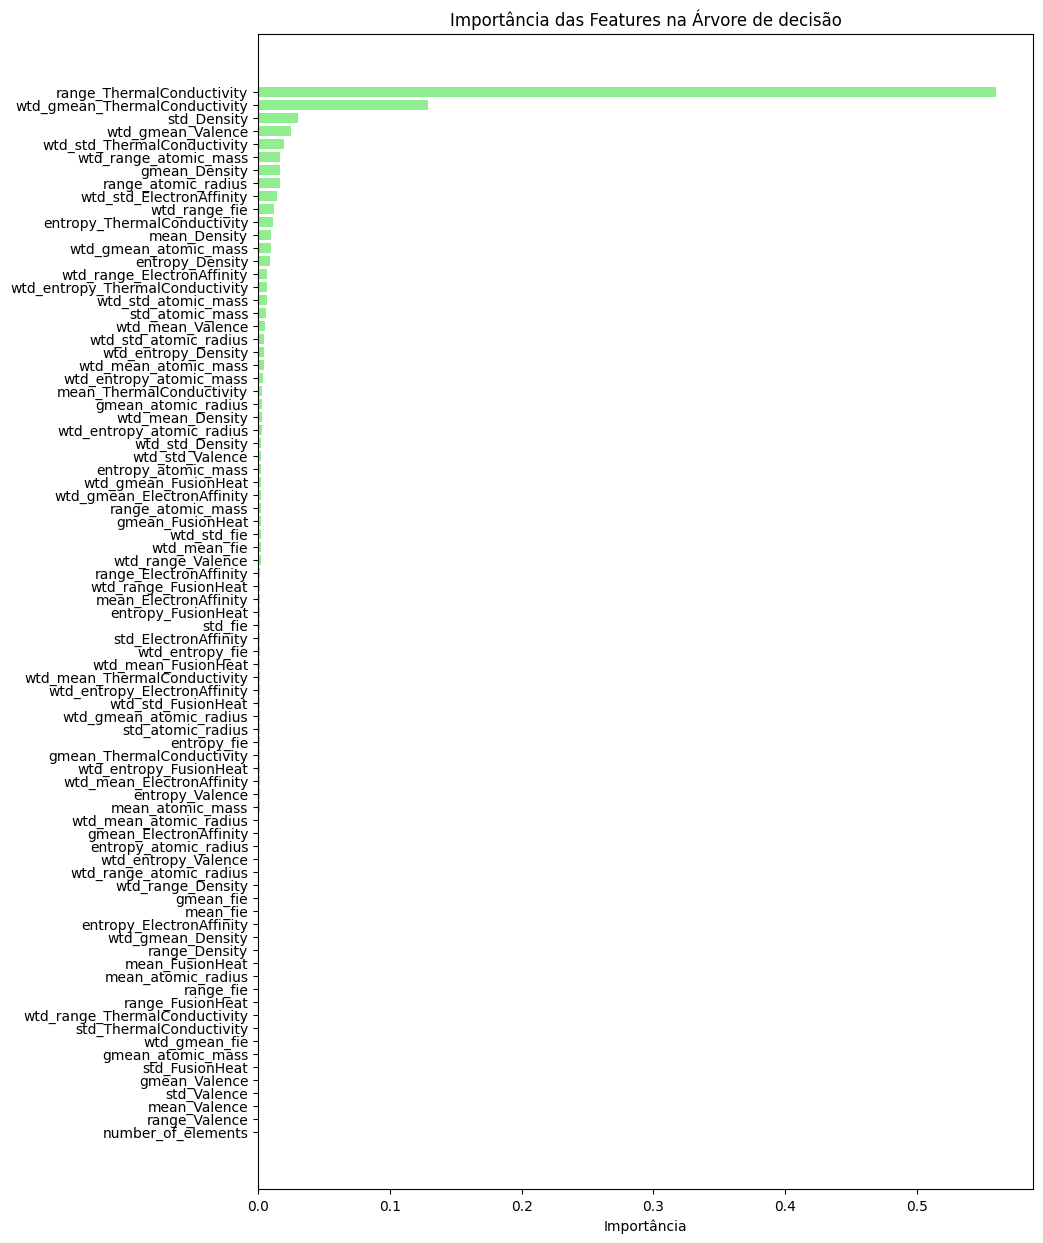

In [ ]:
importancias_arvore = modelo_arvore_decisao.feature_importances_

nomes_features = df3.columns  

df_importancia = pd.DataFrame({
    'Feature': nomes_features,
    'Importância': importancias_arvore
})

df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_importancia['Feature'], df_importancia['Importância'], color="lightgreen")
plt.xlabel('Importância')
plt.title('Importância das Features na Árvore de decisão')
plt.gca().invert_yaxis() 
plt.show()

<center> [Gráfico 3: Importância das Features na Árvore de decisão]

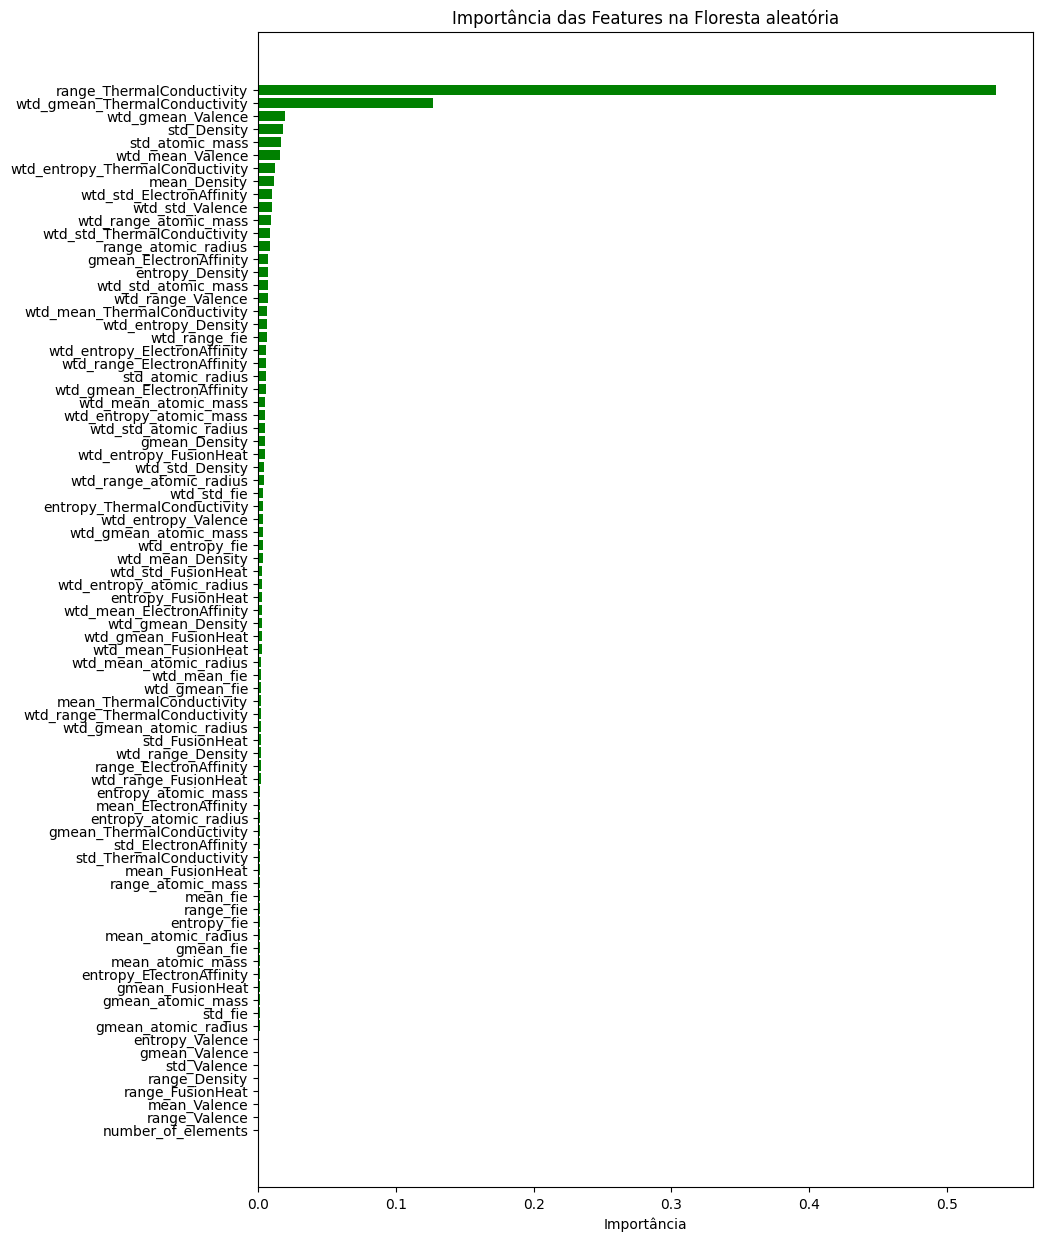

In [ ]:
importancias_floresta = modelo_floresta.feature_importances_

nomes_features = df3.columns  

df_importancia = pd.DataFrame({
    'Feature': nomes_features,
    'Importância': importancias_floresta
})

df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_importancia['Feature'], df_importancia['Importância'], color="green")
plt.xlabel('Importância')
plt.title('Importância das Features na Floresta aleatória')
plt.gca().invert_yaxis() 
plt.show()

<center> [Gráfico 4: Importância das Features na Floresta aleatória]

Como é possível perceber pelos gráficos 1 e 2, dois atributos apresentam majoritária importância para o modelo: ``range_ThermalConductivity`` e ``wtd_gmean_ThermalConductivity``. As demais features apresentam relevância semelhante, especialmente entre as 15 mais próximas, o que pode explicar o desempenho relativamente insatisfatório do método RFE mencionado na referência [3]. É importante ressaltar que, dentre as técnicas de redução de dimensionalidade, o RFE demonstrou o melhor desempenho, quase igualando-se ao modelo que utiliza todas as features. Isso sugere que a redução baseada nos pesos foi mais eficaz do que as abordagens que consideram a correlação entre os dados, como PCA e VIF.

### ⚔️ **Conclusão**

<div style="text-align:justify;">
A partir dos modelos analisados, concluiu-se que a floresta aleatória apresentou um desempenho superior em relação à árvore de decisão. Essa superioridade se deve à maior robustez da floresta, que combina múltiplas árvores, ajudando a mitigar a influência do acaso nas previsões. No entanto, essa complexidade traz um custo: em comparação com a árvore de decisão, a floresta aleatória perde em interpretabilidade, uma vez que visualizar um modelo composto por 95 árvores de decisão se torna inviável.

Portanto, a escolha entre esses modelos deve ser feita de forma cuidadosa, considerando o contexto da aplicação. A questão central é: o que é mais importante neste caso específico: a precisão dos resultados ou a clareza e interpretabilidade do modelo?
</div>


### **Referências**

[1] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 4.1 - Árvore de decisão*. [Material não publicado].

[2] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 5.1 - Floresta aleatória*. [Material não publicado].

[3] Júlia Guedes Almeida dos Santos, Raquel de Godoy Vianna, Thalles José de Souza Cansi. (2024). Jupyter Notebook *Modelos 4*. GitHub. https://github.com/JuliaGuedesASantos/Machine-Learning---Cavaleiros-da-Supernova.

[4] graphviz: Simple Python interface for Graphviz. OS Independent. PyPI, https://github.com/xflr6/graphviz. Acesso em 27 de outubro de 2024.

[5] Github do projeto: https://github.com/JuliaGuedesASantos/Machine-Learning---Cavaleiros-da-Supernova
